In [1]:
#Reading Data Science with Python, chapter 3, Exercise 21
#Linear regression

import pandas as pd
df = pd.read_csv('weather.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description           10000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB


In [3]:
#check number of levels in categorical column Description
levels = len(pd.value_counts(df['Description']))
print(f'There are {levels} levels in the Description column')

There are 3 levels in the Description column


In [4]:
# we must 'dummy-code', create n-1 new binary features corresponding to levels
# for ex., a variable with 3 levels should have 2 binary features
df_dummies = pd.get_dummies(df, drop_first=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description           10000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB


In [6]:
print(f'There are {df_dummies.shape[1]} columns in df_dummies')

There are 9 columns in df_dummies


In [7]:
# it's a good idea to shuffle the rows of the data to remove 'order effects'
from sklearn.utils import shuffle
df_shuffled = shuffle(df_dummies, random_state=42)

In [11]:
#split df_shuffled into x and y as follows:
DV = 'Temperature_c'
X = df_shuffled.drop(DV, axis=1) #all independent variables
y = df_shuffled[DV] # temperature, dependent var

In [12]:
#split x and y into test and training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
# now after data has been dummy coded, shuffled, split x/y, and split test/train,
# it's ready for linear or logistic regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#fit model to humidity
model.fit(X_train[['Humidity']], y_train)

LinearRegression()

In [16]:
#extract intercept (B of y=mx+B)
intercept = model.intercept_
#extract coefficient (m of y=mx+B)
coefficient = model.coef_
print('Temperature = {0:0.2f} + ({1:0.2f} x Humidity)'.format(intercept, coefficient[0]))

Temperature = 34.50 + (-30.69 x Humidity)


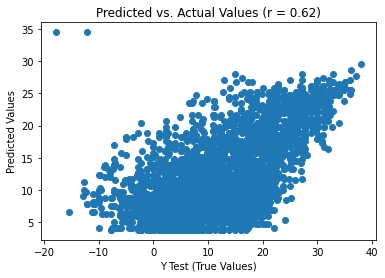

In [20]:
###########################################
###########################################
########### EXERCISE 23 ###################
###########################################
###########################################

#generate predictions on the test data using the following:
predictions = model.predict(X_test[['Humidity']])
#it's good to evaluate performance by examining correlation between 
#predicted and actual values using scatterplot
# Pearson r correlation coefficient describes this relationship 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0], 2))
plt.show()
#0.62 pearson coef shows moderate positive corr.

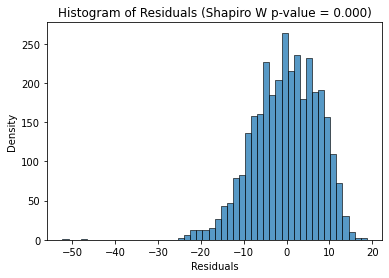

In [25]:
#a model that fits data really well has normally distributed residuals
# create density plot of residuals
import seaborn as sns
from scipy.stats import shapiro
sns.histplot((y_test - predictions), bins = 50)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - predictions)[1]))
plt.show()
#p-value shows us that the distribution is NOT normal.
#negatively skewed = more negative tail


In [26]:
#compute metrics
##mean absolute error: avg. absolute difference between predict and actual
##mean squared error: avg of squared difference between predict and actual
##root mean squared error: sqrt(mse)
##r-squared: tells us proportion of variance in dependent variable that can be explained by model
###so for this, humidity explained only 38.9% of the variance in temperature
###additionally, predictions were within +/- 6.052 degC
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame({'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'], 'Value':[metrics.mean_absolute_error(y_test, predictions), metrics.mean_squared_error(y_test, predictions), np.sqrt(metrics.mean_squared_error(y_test, predictions)), metrics.explained_variance_score(y_test, predictions)]}).round(3)
print(metrics_df)

      Metric   Value
0        MAE   6.052
1        MSE  56.187
2       RMSE   7.496
3  R-Squared   0.389


In [27]:
###########################################
###########################################
########### EXERCISE 24 ###################
###########################################
###########################################

#let's make a multiple linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [28]:
# fit model to training data
model.fit(X_train, y_train)

LinearRegression()

In [29]:
#extract value for intercept and coefficient
intercept = model.intercept_
coefficients = model.coef_
print('Temperature = {0:0.2f} + ({1:0.2f} x Humidity) + ({2:0.2f} x Wind Speed) + ({3:0.2f} x Wind Bearing Degrees) + ({4:0.2f} x Visibility) + ({5:0.2f} x Pressure) + ({6:0.2f} x Rain) + ({7:0.2f} x Normal Weather) + ({8:0.2f} x Warm Weather)'.format(intercept,coefficients[0],coefficients[1],coefficients[2],coefficients[3],coefficients[4],coefficients[5],coefficients[6],coefficients[7]))

Temperature = 3.54 + (-7.93 x Humidity) + (-0.07 x Wind Speed) + (0.00 x Wind Bearing Degrees) + (0.06 x Visibility) + (0.00 x Pressure) + (5.61 x Rain) + (8.54 x Normal Weather) + (19.10 x Warm Weather)


In [ ]:
#can do the same following steps as simple linear reg example above, it will usually have better performance

In [30]:
###########################################
###########################################
########### EXERCISE 25 ###################
###########################################
###########################################
# Fitting a logistic regression model and determining the intercepts and coefficients
import pandas as pd
df = pd.read_csv('weather.csv')
df

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold
...,...,...,...,...,...,...,...,...
9995,10.022222,0.95,10.2396,20,4.0089,1007.41,1,Normal
9996,8.633333,0.64,11.0446,80,9.9820,1031.33,1,Normal
9997,5.977778,0.93,11.0446,269,14.9086,1014.21,1,Normal
9998,9.788889,0.78,8.1788,231,7.8246,1005.02,1,Normal


In [42]:
#dummy code description variable
df_dummies=pd.get_dummies(df, drop_first=False)
df_dummies

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Cold,Description_Normal,Description_Warm
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,1,0,0
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,0,0,1
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,0,1,0
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,1,0,0
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,10.022222,0.95,10.2396,20,4.0089,1007.41,1,0,1,0
9996,8.633333,0.64,11.0446,80,9.9820,1031.33,1,0,1,0
9997,5.977778,0.93,11.0446,269,14.9086,1014.21,1,0,1,0
9998,9.788889,0.78,8.1788,231,7.8246,1005.02,1,0,1,0


In [44]:
#shuffle df_dummies
from sklearn.utils import shuffle
df_shuffled = shuffle(df_dummies, random_state=42)
df_shuffled

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Cold,Description_Normal,Description_Warm
6252,-2.727778,0.51,25.2287,2,11.4471,1036.09,0,1,0,0
4684,11.094444,0.86,3.7030,283,9.9820,1017.35,1,0,1,0
1731,1.122222,0.88,12.1877,167,4.9105,1020.45,1,1,0,0
4742,-2.850000,0.64,10.4489,11,9.9820,1028.93,0,1,0,0
4521,7.777778,0.96,6.4400,180,3.0590,999.00,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
5734,8.888889,0.77,9.6600,20,9.9820,1019.50,1,0,1,0
5191,7.194444,0.65,23.7153,320,10.2557,1022.81,1,0,1,0
5390,1.088889,0.92,12.5419,21,6.3434,1026.62,1,1,0,0
860,31.344444,0.34,9.6761,174,9.9820,1017.01,1,0,0,1


In [45]:
# split features and outcomes into X and y
DV = 'Rain'
X = df_shuffled.drop(DV, axis=1)
y = df_shuffled[DV]
X

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Description_Cold,Description_Normal,Description_Warm
6252,-2.727778,0.51,25.2287,2,11.4471,1036.09,1,0,0
4684,11.094444,0.86,3.7030,283,9.9820,1017.35,0,1,0
1731,1.122222,0.88,12.1877,167,4.9105,1020.45,1,0,0
4742,-2.850000,0.64,10.4489,11,9.9820,1028.93,1,0,0
4521,7.777778,0.96,6.4400,180,3.0590,999.00,0,1,0
...,...,...,...,...,...,...,...,...,...
5734,8.888889,0.77,9.6600,20,9.9820,1019.50,0,1,0
5191,7.194444,0.65,23.7153,320,10.2557,1022.81,0,1,0
5390,1.088889,0.92,12.5419,21,6.3434,1026.62,1,0,0
860,31.344444,0.34,9.6761,174,9.9820,1017.01,0,0,1


In [46]:
y

6252    0
4684    1
1731    1
4742    0
4521    1
       ..
5734    1
5191    1
5390    1
860     1
7270    1
Name: Rain, Length: 10000, dtype: int64

In [35]:
# split features/outcomes into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
# instantiate logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [41]:
# fit model to data
model.fit(X_test, y_test)

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
# get intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

In [48]:
# place coefficients into a list
coef_list = list(coefficients[0,:])

In [49]:
# match features to coefficients, place in dataframe, and print to console
coef_df = pd.DataFrame({'Feature':list(X_train.columns), 'Coefficient':coef_list})
print(coef_df)

                Feature  Coefficient
0         Temperature_c     4.993267
1              Humidity     1.069963
2        Wind_Speed_kmh    -0.034240
3  Wind_Bearing_degrees    -0.000672
4         Visibility_km    -0.018998
5    Pressure_millibars    -0.001408
6    Description_Normal     0.051294
7      Description_Warm     0.024165


In [50]:
# so for every 1 degree increase in temperature, the log odds of rain increase by 4.99

###########################################
###########################################
########### EXERCISE 26 ###################
###########################################
###########################################

#generate predicted probabilities and classes as well as evaluating
#a model performance using a confusion matrix and classification report

#generate predicted probabilities
predicted_prob=model.predict_proba(X_test)[:,1]

In [51]:
#generate predicted classes
predicted_class = model.predict(X_test)

In [53]:
#evaluate performance using confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
cm = pd.DataFrame(confusion_matrix(y_test, predicted_class))
cm['Total']=np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns=['Predicted No', 'Predicted Yes', 'Total']
cm=cm.set_index([['Actual No', 'Actual Yes', 'Total']])
print(cm)

            Predicted No  Predicted Yes  Total
Actual No            383              0    383
Actual Yes            12           2905   2917
Total                395           2905   3300


C:\Users\jerem\AppData\Local\Temp\ipykernel_32244\3209365992.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cm = cm.append(np.sum(cm, axis=0), ignore_index=True)


In [54]:
# so all of the No's were guessed correctly, and 2905/2917 Yes's were guessed correctly

#now generate a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_class))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       383
           1       1.00      1.00      1.00      2917

    accuracy                           1.00      3300
   macro avg       0.98      1.00      0.99      3300
weighted avg       1.00      1.00      1.00      3300



In [55]:
# so the model is doing well. but now let's tune it

###########################################
###########################################
########### EXERCISE 27 ###################
###########################################
###########################################

#Tuning the Hyperparameters of a Multiple Logistic Regression Model
# using scikit-learn's grid search function

# following from exercise 26, the data is already prepared
#instantiate a grid of possible hyperparameter values
import numpy as pd
grid = {'penalty':['l1','l2'], 'C':np.linspace(1,10,10), 'solver':['liblinear']}

In [56]:
#instantiate a grid search model to find the model with greatest f1 score 
# (f1: harmonic average of precision and recall)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model=GridSearchCV(LogisticRegression(solver='liblinear'), grid, scoring='f1',cv=5)

In [57]:
# fit the model to the training data
model.fit(X_train, y_train)

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kf

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kf

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1')

In [58]:
#return optimal combination of hyperparameters as a dictionary
best_parameters = model.best_params_
print(best_parameters)

{'C': 9.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [59]:
###########################################
###########################################
########### EXERCISE 28 ###################
###########################################
###########################################

#Preparing data for the Support Vector Classifier (SVC) Model
import pandas as pd
df = pd.read_csv('weather.csv')

In [60]:
#dummy code description
df_dummies = pd.get_dummies(df, drop_first=True)

In [61]:
#shuffle df_dummies
from sklearn.utils import shuffle
df_shuffled = shuffle(df_dummies, random_state=42)

In [62]:
#split df_shuffled into X and y
DV = 'Rain'
X = df_shuffled.drop(DV, axis=1)
y = df_shuffled[DV]
X

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Description_Normal,Description_Warm
6252,-2.727778,0.51,25.2287,2,11.4471,1036.09,0,0
4684,11.094444,0.86,3.7030,283,9.9820,1017.35,1,0
1731,1.122222,0.88,12.1877,167,4.9105,1020.45,0,0
4742,-2.850000,0.64,10.4489,11,9.9820,1028.93,0,0
4521,7.777778,0.96,6.4400,180,3.0590,999.00,1,0
...,...,...,...,...,...,...,...,...
5734,8.888889,0.77,9.6600,20,9.9820,1019.50,1,0
5191,7.194444,0.65,23.7153,320,10.2557,1022.81,1,0
5390,1.088889,0.92,12.5419,21,6.3434,1026.62,0,0
860,31.344444,0.34,9.6761,174,9.9820,1017.01,0,1


In [63]:
y

6252    0
4684    1
1731    1
4742    0
4521    1
       ..
5734    1
5191    1
5390    1
860     1
7270    1
Name: Rain, Length: 10000, dtype: int64

In [64]:
#split X and y into testing and training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [65]:
#to prevent data leakage, scale X_train and X_test by 
# fitting scaler model to X_train + transforming them to z-scores separately
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
X_train_scaled = model.fit_transform(X_train)
X_test_scaled = model.transform(X_test)

In [66]:
###########################################
###########################################
########### EXERCISE 29 ###################
###########################################
###########################################

#now that we've divided into features/outcomes, split into test/train,
#and scaled separately, we're ready to tune hyperparameters

#instantiate grid for which to search 
import numpy as np
grid = {'C':np.linspace(1,10,10),'kernel':['linear','poly','rbf','sigmoid']}

In [67]:
#instantiate grid search cv model 
# with gamma hyperparameter set to auto to avoid warnings, and
# set probability to True so we can extract probability of Rain

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
model = GridSearchCV(SVC(gamma='auto'), grid, scoring='f1',cv=5)

In [68]:
# fit the grid search model 
model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1')

In [69]:
#print best parameters
best_parameters = model.best_params_
print(best_parameters)

{'C': 1.0, 'kernel': 'linear'}


In [ ]:
# now extract predicted classes
## create and print a confusion matrix
## generate and print a classification report

In [70]:
###########################################
###########################################
########### ACTIVITY 8  ###################
###########################################
###########################################

import pandas as pd
df = pd.read_csv('weather.csv')
df

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold
...,...,...,...,...,...,...,...,...
9995,10.022222,0.95,10.2396,20,4.0089,1007.41,1,Normal
9996,8.633333,0.64,11.0446,80,9.9820,1031.33,1,Normal
9997,5.977778,0.93,11.0446,269,14.9086,1014.21,1,Normal
9998,9.788889,0.78,8.1788,231,7.8246,1005.02,1,Normal


In [71]:
#dummy code the multi-level, categorical feature Summary
df_dummies = pd.get_dummies(df, drop_first=True)

In [72]:
#shuffle the data
from sklearn.utils import shuffle
df_shuffled = shuffle(df_dummies, random_state=42)

In [73]:
#split the data into features/outcomes
DV = 'Rain'
X = df_shuffled.drop(DV, axis=1)
y = df_shuffled[DV]

In [74]:
# split features/outcomes into test/train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [76]:
#scale X_train and X_test
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
X_train_scaled = model.fit_transform(X_train)
X_test_scaled = model.transform(X_test)

In [78]:
###########################################
###########################################
########### EXERCISE 30 ###################
###########################################
###########################################

# Tuning a Decision Tree Classifier Using Grid Search

#From activity 8:
# specify the hyperparameter space
import numpy as np
grid = {'criterion':['gini', 'entropy'], 'min_weight_fraction_leaf':np.linspace(0.0, 0.5, 10), 'min_impurity_decrease':np.linspace(0.0, 1.0, 10), 'class_weight':[None, 'balanced'], 'presort':[True, False]}

In [79]:
#instantiate gridsearchcv model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
model = GridSearchCV(DecisionTreeClassifier(), grid, scoring='f1', cv=5)

In [80]:
#fit to the training set
model.fit(X_train_scaled, y_train)

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'min_impurity_decrease': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'min_weight_fraction_leaf': array([0.        , 0.05555556, 0.11111111, 0.16666667, 0.22222222,
       0.27777778, 0.33333333, 0.38888889, 0.44444444, 0.5       ]),
                         'presort': [True, False]},
             scoring='f1')

In [82]:
#print tuned parameters
best_parameters = model.best_params_
print(best_parameters)

{'class_weight': None, 'criterion': 'gini', 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.0, 'presort': True}


In [83]:
#so it uses gini inpurity as criterion to measure quality of split in DT

###########################################
###########################################
########### EXERCISE 31 ###################
###########################################
###########################################

#access value for 'Tree_criterion'
print(best_parameters['criterion'])

gini


In [85]:
#instantiate decision tree classifier model 
# + assign values to corresponding hyperparameters
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight=best_parameters['class_weight'], criterion=best_parameters['criterion'], min_impurity_decrease=best_parameters['min_impurity_decrease'], min_weight_fraction_leaf=best_parameters['min_weight_fraction_leaf'], presort=best_parameters['presort'])


In [86]:
# fit the grid search model to the scaled training data
model.fit(X_train_scaled, y_train)

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


DecisionTreeClassifier(presort=True)

In [87]:
# extract feature importance attribute 
print(model.feature_importances_)

[1. 0. 0. 0. 0. 0. 0. 0.]


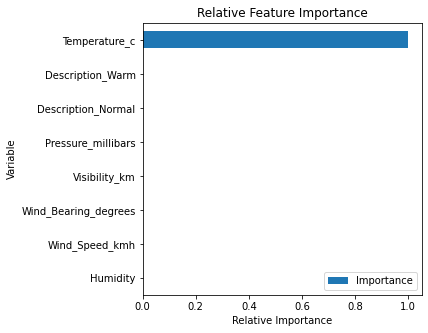

In [88]:
# so first feature dominated other variables in terms of feature importance

#visualize this
import pandas as pd
import matplotlib.pyplot as plt
df_imp = pd.DataFrame({'Importance':list(model.feature_importances_)}, index=X.columns)
df_imp_sorted = df_imp.sort_values(by=('Importance'), ascending=True)
df_imp_sorted.plot.barh(figsize=(5,5))
plt.title('Relative Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Variable')
plt.legend(loc=4)
plt.show()

In [89]:
###########################################
###########################################
########### EXERCISE 32 ###################
###########################################
###########################################

#RANDOM FORESTS
# preare data for random forest regressor
#  with Tempearture_c as dependent variable

import pandas as pd
df = pd.read_csv('weather.csv')

In [90]:
#dummy code multi-class categorical variable Description
import pandas as pd
df_dummies = pd.get_dummies(df, drop_first=True)

In [91]:
#shuffle df_dummies
from sklearn.utils import shuffle
df_shuffled = shuffle(df_dummies, random_state=42)

In [92]:
#split df_shuffled into X and y
DV='Temperature_c'
X = df_shuffled.drop(DV, axis=1)
y = df_shuffled[DV]

In [94]:
#Split X and y into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
#Scale X_train and X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
#Now we have imported, shuffled, separated into features/outcomes, and split into test/train data, and scaled
# now we will tune random forest regressor model using grid search

########################################
########################################
############## ACTIVITY 10 #############
########################################
########################################

#specify hyperparameter space 
grid = {'criterion':['mse', 'mae'], 'max_features':['auto','sqrt','log2',None],'min_impurity_decrease':np.linspace(0.0,1.0,10), 'bootstrap':[True, False], 'wamr_start':[True, False]}


In [102]:
#instantiate gridsearchcv model optimizing the explained variance
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
model = GridSearchCV(RandomForestRegressor(), grid, scoring='explained_variance', cv=5)

In [103]:
#fit grid search model to training set
model.fit(X_train_scaled, y_train)

ValueError: Invalid parameter wamr_start for estimator RandomForestRegressor(). Check the list of available parameters with `estimator.get_params().keys()`.

In [104]:
#ugh, running into errors. That finishes Chapter 3...